<a href="https://colab.research.google.com/github/sitthatkaja/DPDM2023/blob/main/dpdm23_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam

Use data in [GDrive](https://drive.google.com/drive/folders/1XbCThEWAcYZOg8vl1diHEOW0GL1nLUzX?usp=sharing) to train find the best Data Mining - Machine Learning model that can predict the SalePrice correctly.

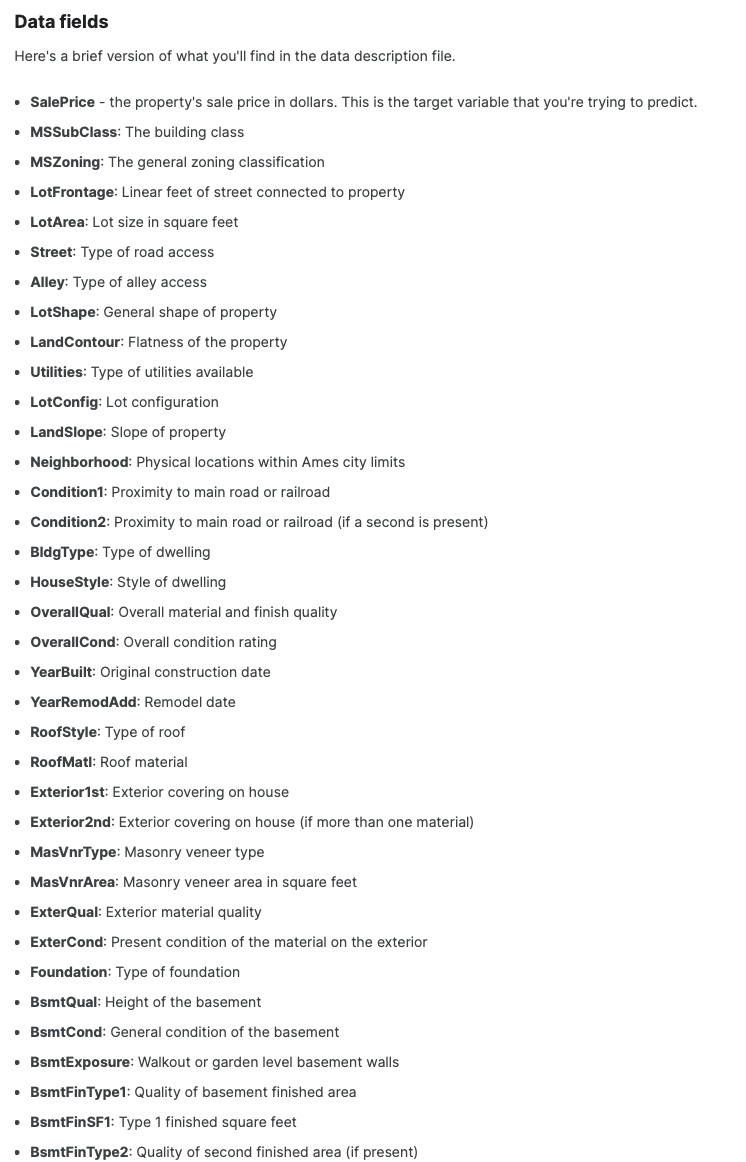

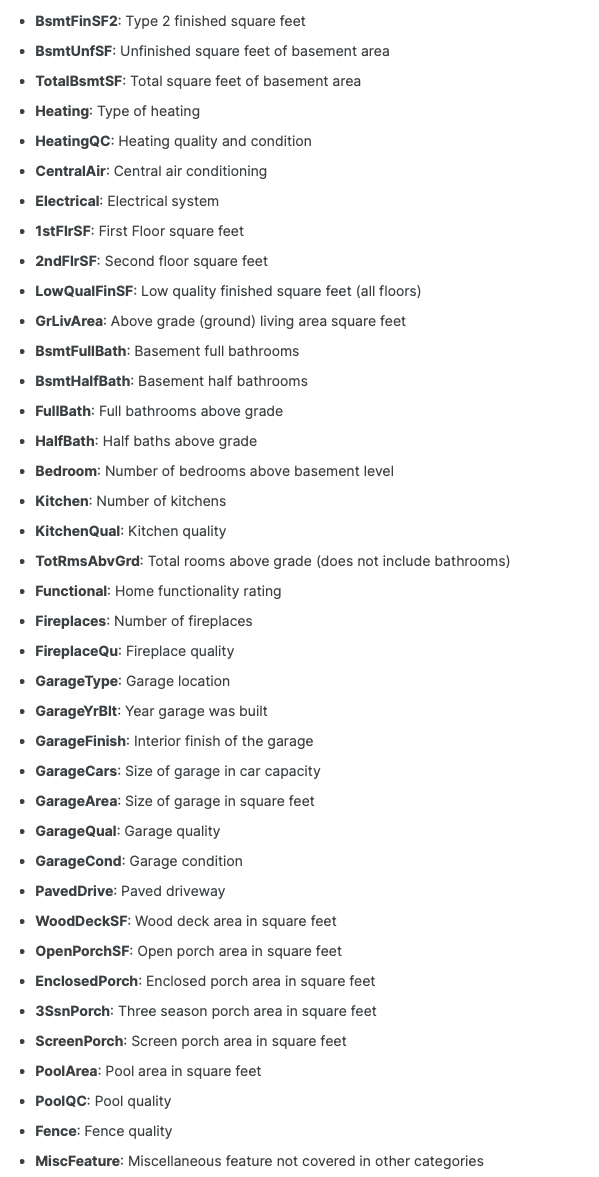

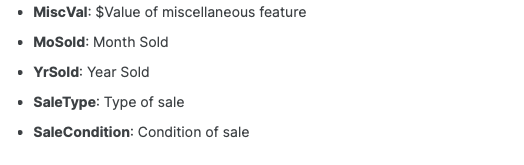

*Hint: Use Mean Average Percentage Error (MAPE) and Mean Square Error (MSE) as the evaluation metrics*

*Hint2: Try your best to show appropriate, unbias data mining-machine learning process to select the best model and to report the result*

*Hint3: The final score will be based on: Effort, Report, DM-ML Process, Model Performance*

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


## import

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/FinalExam.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
new_df = data[['LotFrontage','LotArea','YrSold','SalePrice']]
new_df

,LotFrontage,LotArea,YrSold,SalePrice
0,65.0,8450,2008,208500
1,80.0,9600,2007,181500
2,68.0,11250,2008,223500
3,60.0,9550,2006,140000
4,84.0,14260,2008,250000
...,...,...,...,...
1455,62.0,7917,2007,175000
1456,85.0,13175,2010,210000
1457,66.0,9042,2010,266500
1458,68.0,9717,2010,142125


In [10]:
new_df.isnull().any()

LotFrontage     True
LotArea        False
YrSold         False
SalePrice      False
dtype: bool

In [11]:
new_df = new_df.fillna({'LotFrontage':np.round(new_df['LotFrontage'].mean())})
new_df.head()

,LotFrontage,LotArea,YrSold,SalePrice
0,65.0,8450,2008,208500
1,80.0,9600,2007,181500
2,68.0,11250,2008,223500
3,60.0,9550,2006,140000
4,84.0,14260,2008,250000


In [12]:
new_df.isnull().any()

LotFrontage    False
LotArea        False
YrSold         False
SalePrice      False
dtype: bool

## SET train test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X, y = new_df.iloc[:,:-1], new_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
ln = LinearRegression()
ln.fit(X_train, y_train)
y_pred_lnr = ln.predict(X_test)

In [17]:
import matplotlib.pyplot as plt

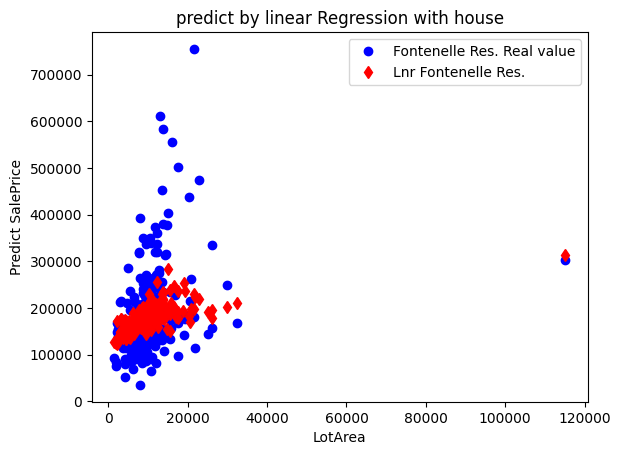

In [18]:
plt.plot(X_test['LotArea'], y_test, 'ob',label='Fontenelle Res. Real value')
plt.plot(X_test['LotArea'],y_pred_lnr,'dr',label='Lnr Fontenelle Res.')
plt.xlabel("LotArea")
plt.ylabel("Predict SalePrice")
plt.title('predict by linear Regression with house')
plt.legend();

## Statistic measurement for evaluation metrics

In [19]:
from sklearn.metrics import mean_squared_error

MSE

In [22]:
mse = mean_squared_error(y_test, y_pred_lnr)
mse

7223452601.082174

MAPE

In [24]:
mape = np.mean(np.abs((y_test -  y_pred_lnr) / y_test)) * 100
mape

33.423305426551295